<div class="alert alert-danger" role="alert">
<h1>Convolutional Neural Network (CNN)</h1>
<ul>
<li><ol  start='1'>
<li>Import Libraries</li>

</ol>
</li>
<li><ol start='2' >
<li>Prepare Dataset</li>

</ol>
</li>
<li><ol start='3' >
<li>Convolutional layer</li>

</ol>
</li>
<li><ol start='4' >
<li>Pooling Layer</li>
 
</ol>
</li>
<li><ol start='5' >
<li>Flattening</li>
    
</ol>
</li>
<li><ol start='6' >
<li>Fully Connected Layer</li>

</ol>
</li>
<li><ol start='7' >
<li>Instantiate Model Class</li>
    
</ol>
</li>
<li><ol start='8' >
<li>Instantiate Loss</li>

    
</ol>
</li>
<li><ol start='9' >
<li>Instantiate Optimizer</li>
    
    
</ol>
</li>
<li><ol start='10' >
<li>Training the Model</li>

</ol>
</li>
<li><ol start='11' >
<li>Prediction</li>
    
</ol>
</li>
   
</ul>
</div>

In [7]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [8]:
# prepare dataset
# load data
train = pd.read_csv(r"datasets\digit-recognizer\train.csv", dtype=np.float32)

# split datainfo features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size=0.2,
                                                                             random_state=42)

# create feature and targets tensor for train set. 
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [12]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [15]:
# CNN model training 
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # clear gradients
        optimizer.zero_grad()
        
        # forward propagation
        outputs = model(train)
        
        # calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # calculating gradients
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # calculate accuracy
            correct = 0
            total = 0
            # iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # forward propagation
                outputs = model(test)
                
                # get predictions from the max value
                predicted = torch.max(outputs.data, 1)[1]
                
                # total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        if count % 500 == 0:
            # print loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.08713875710964203  Accuracy: 96.5 %
Iteration: 1000  Loss: 0.035358015447854996  Accuracy: 97.67857360839844 %
Iteration: 1500  Loss: 0.03187111020088196  Accuracy: 97.72618865966797 %
Iteration: 2000  Loss: 0.012905526906251907  Accuracy: 98.26190185546875 %


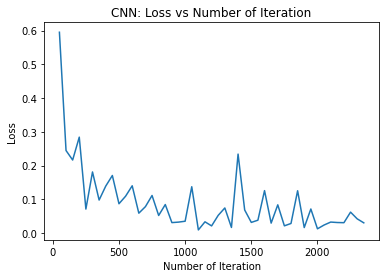

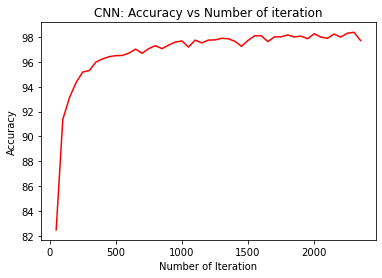

In [16]:
# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of Iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list, accuracy_list, color='red')
plt.xlabel("Number of Iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()